In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import pandas as pd
from itertools import product

In [11]:
from da_utils import plot_diff_all, plot_gem0_scan

/cobra/u/yyudin/code/MFW/uq/basicda/da_utils.py:245: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(figsize=[7, 7])


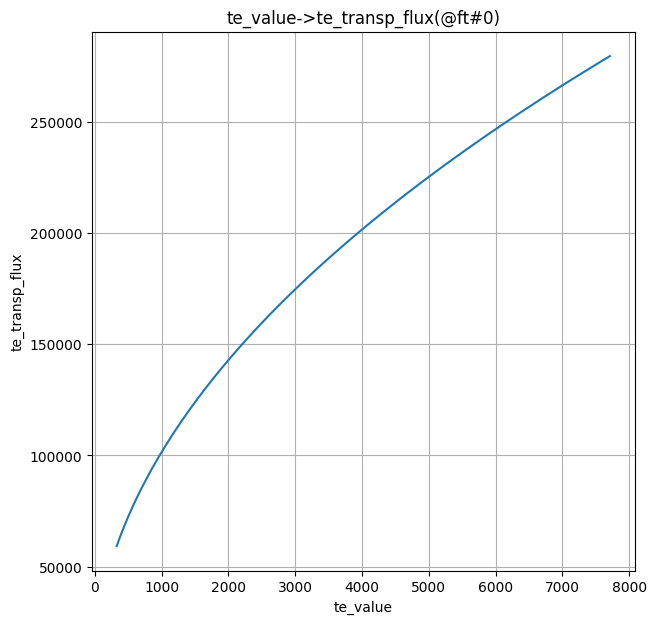

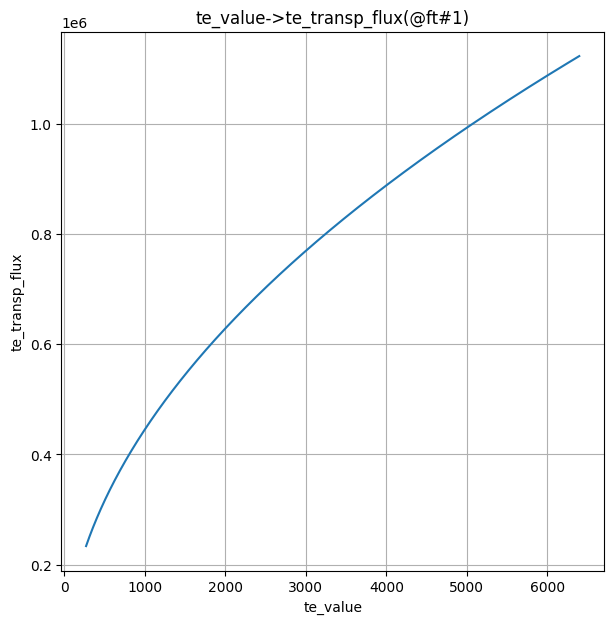

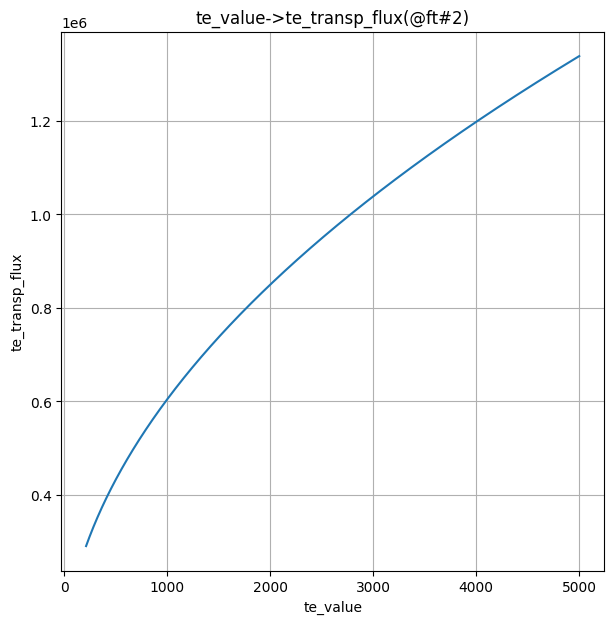

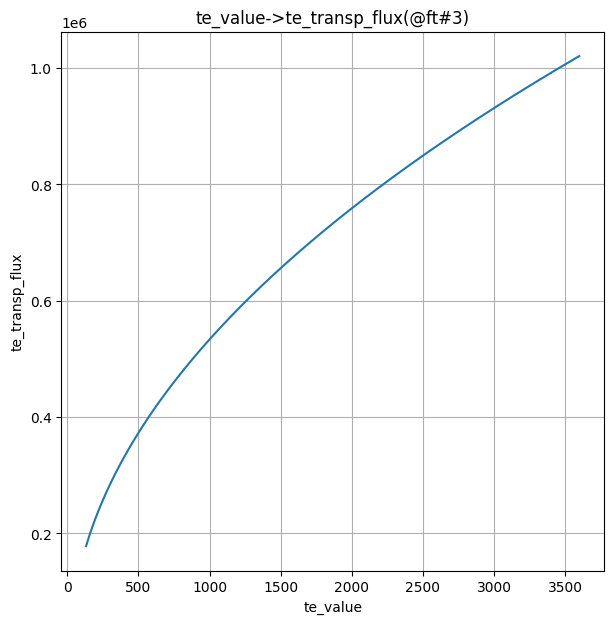

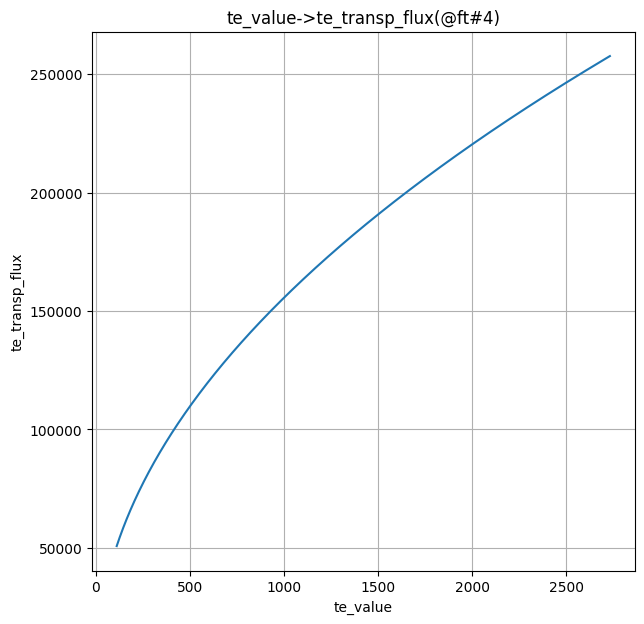

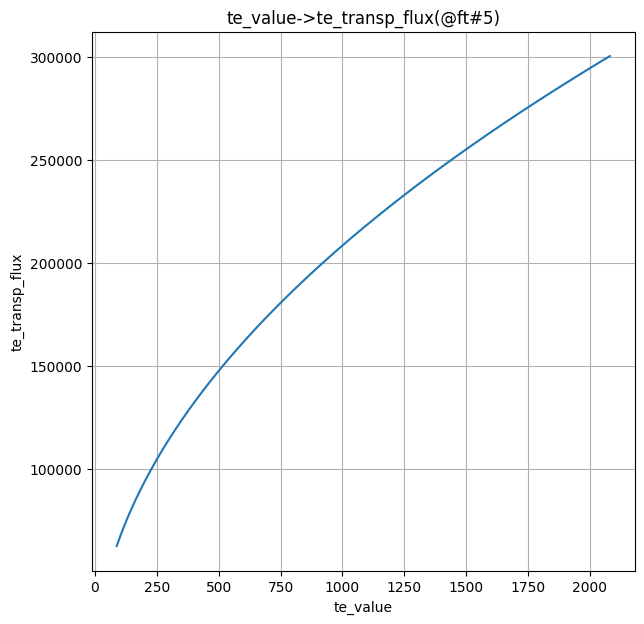

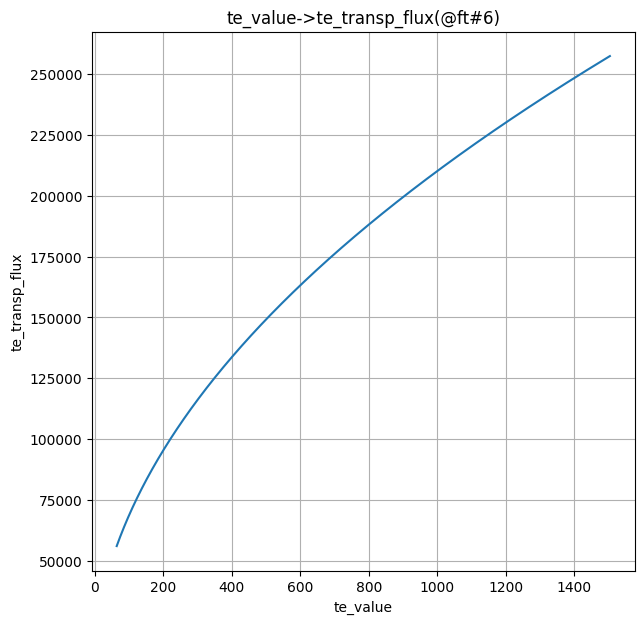

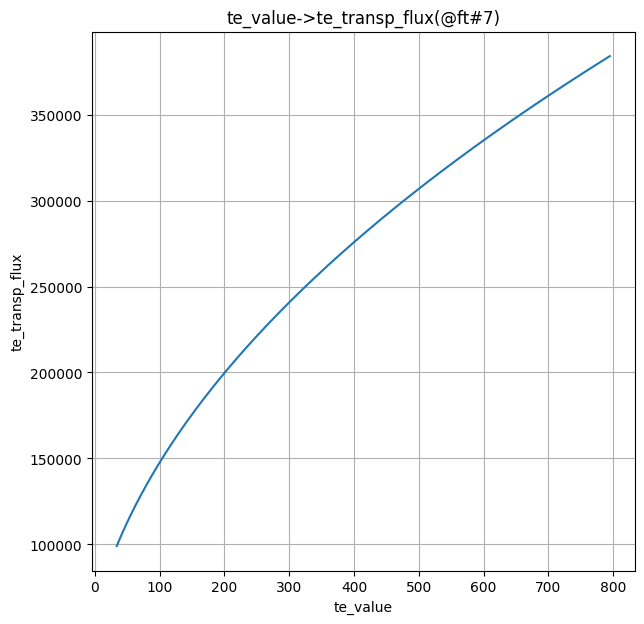

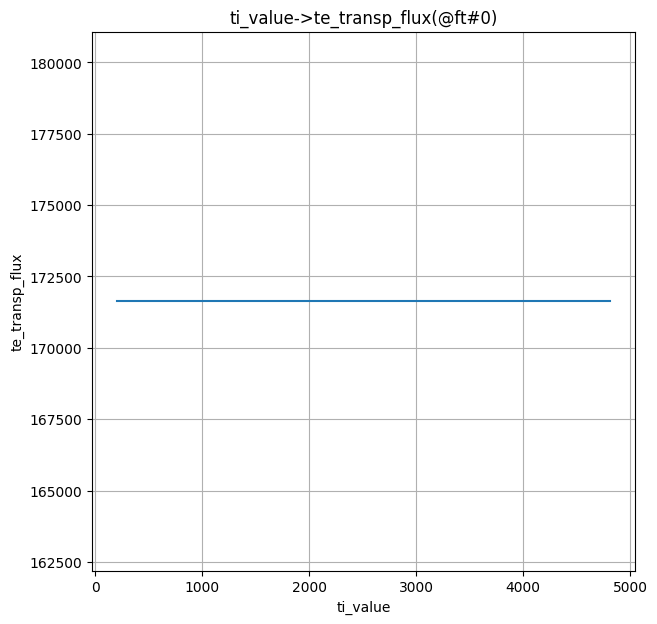

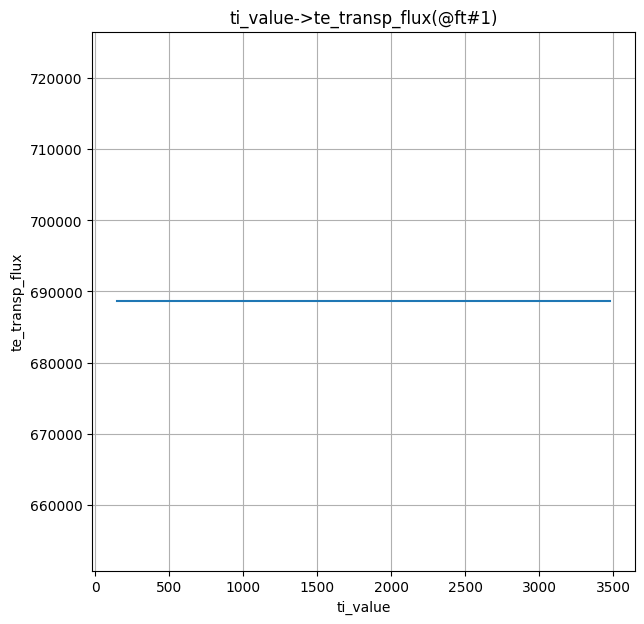

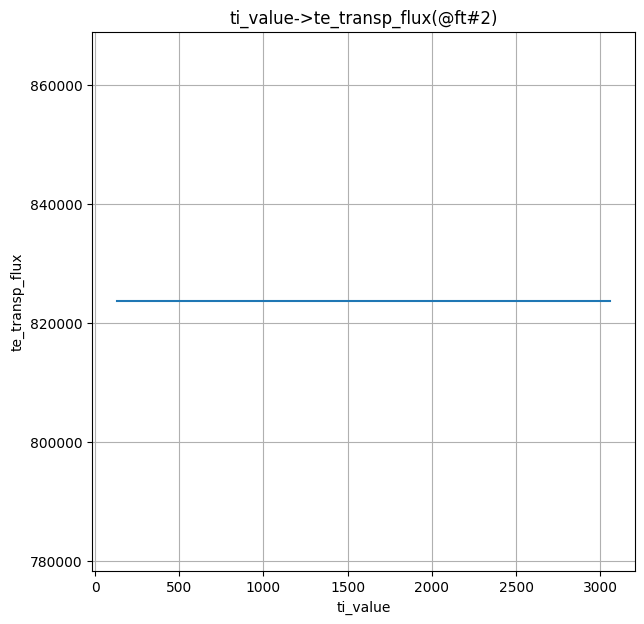

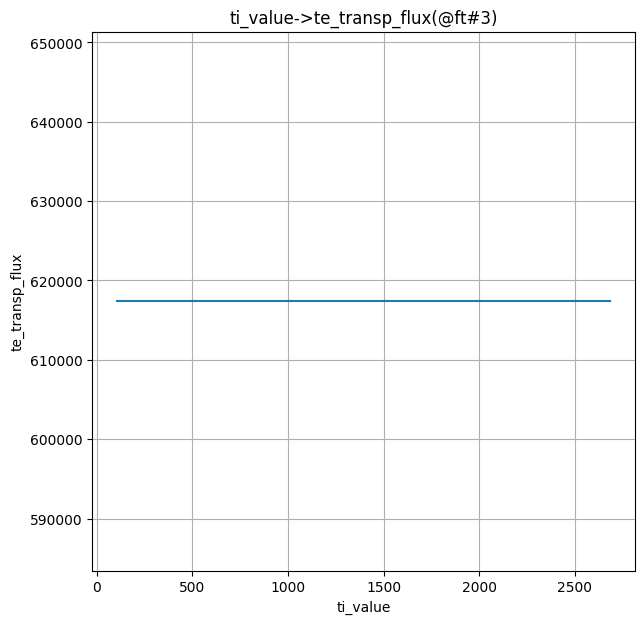

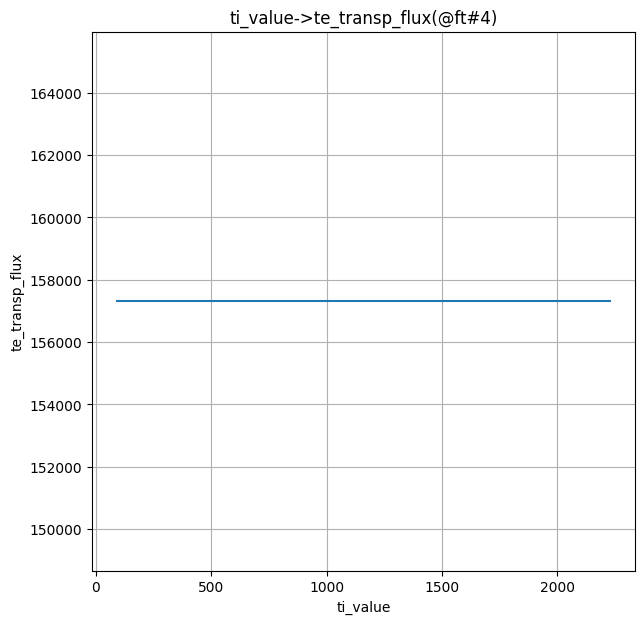

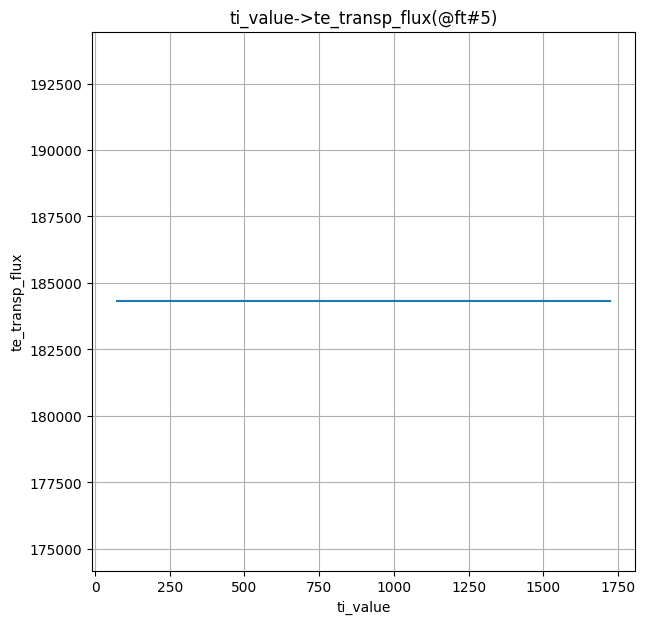

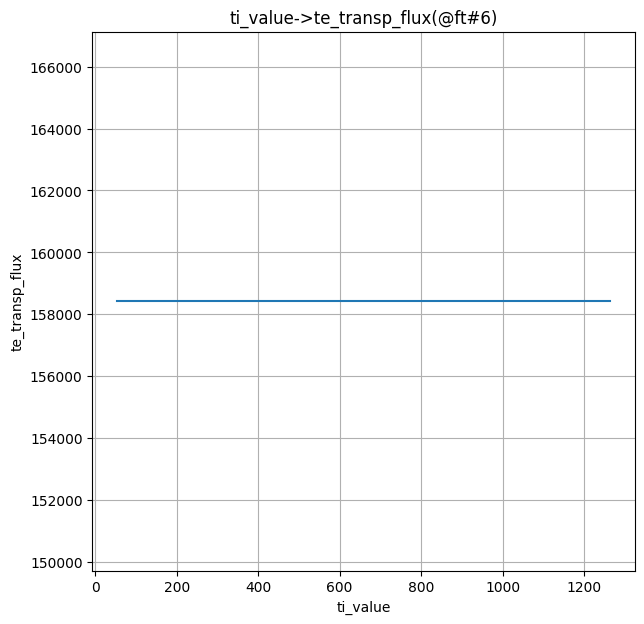

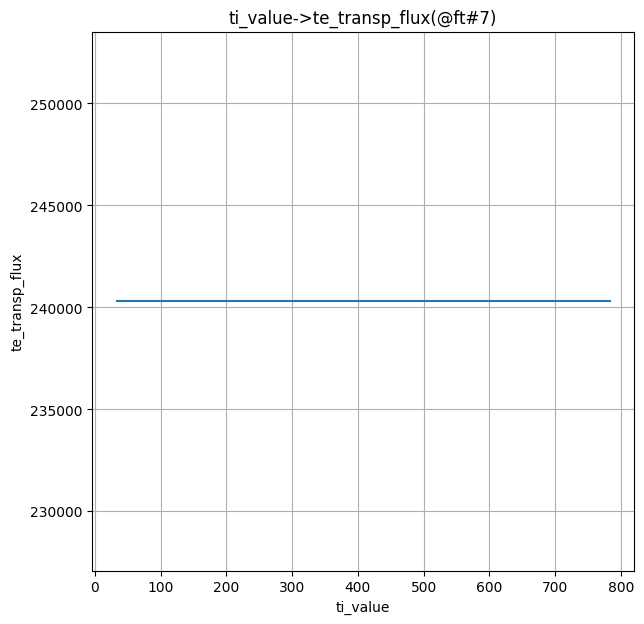

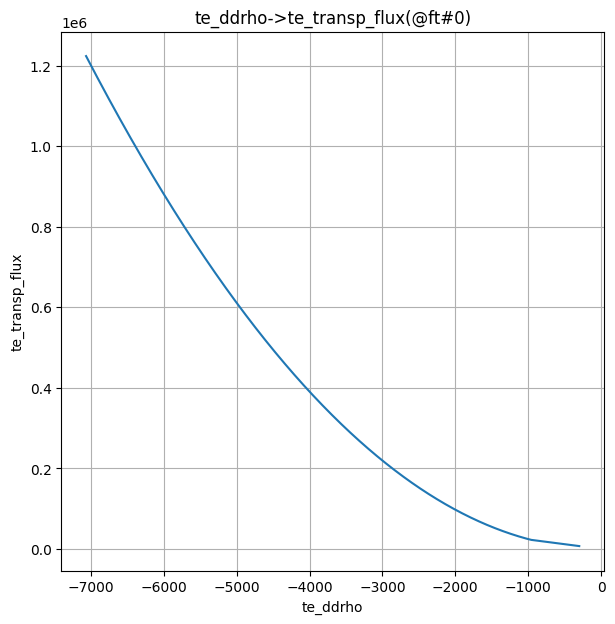

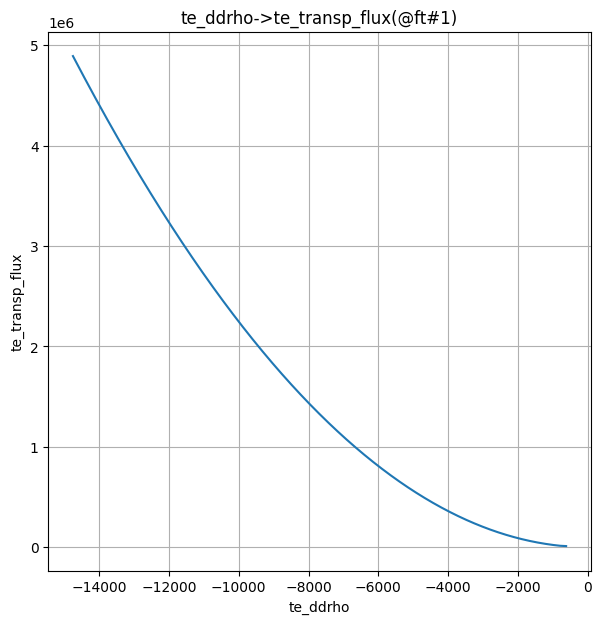

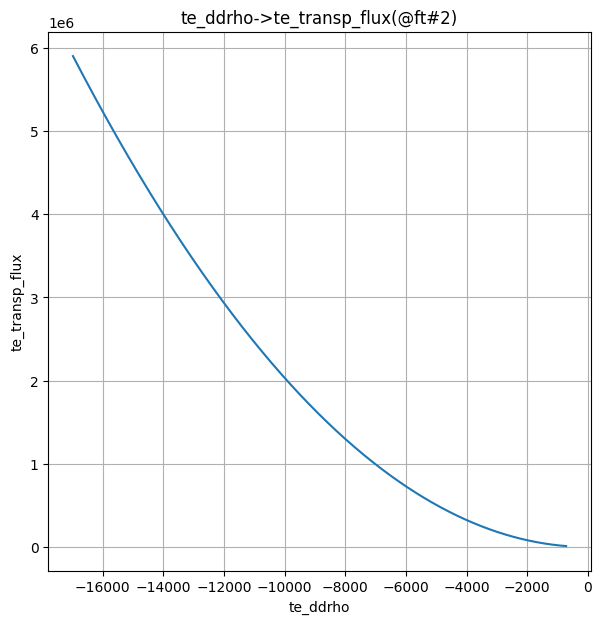

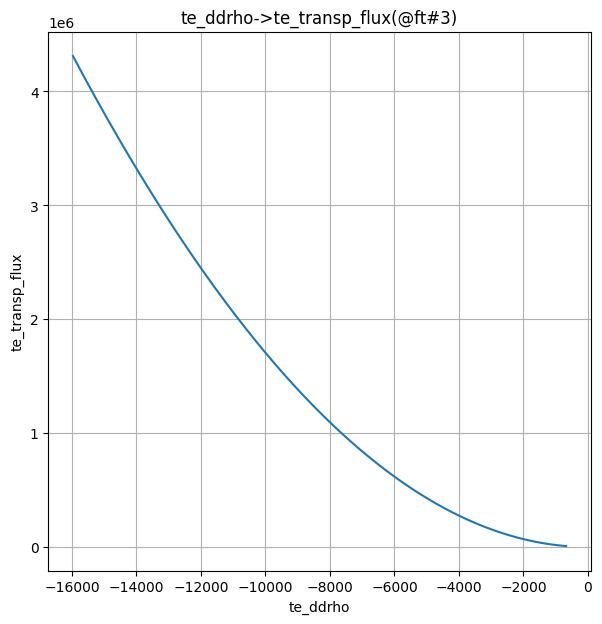

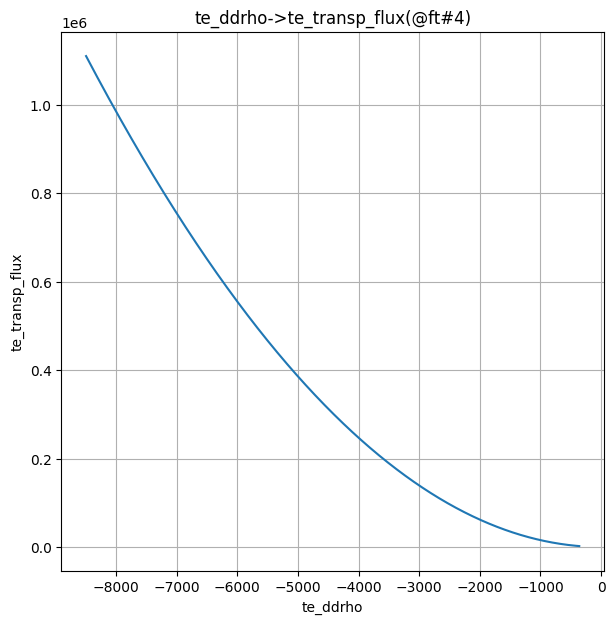

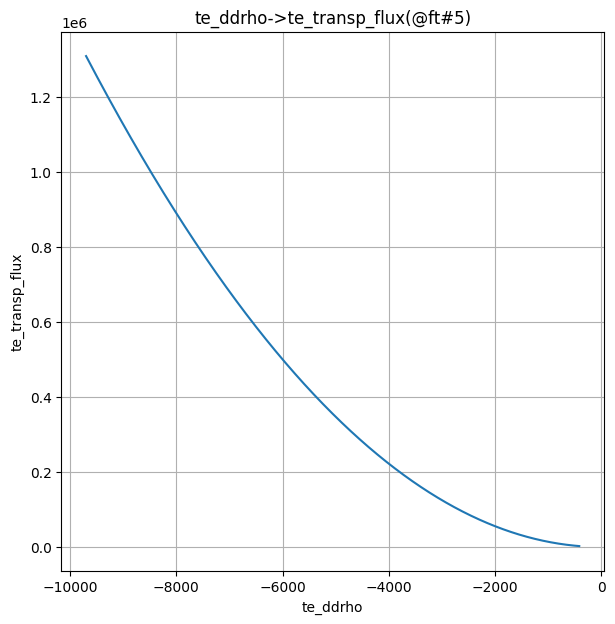

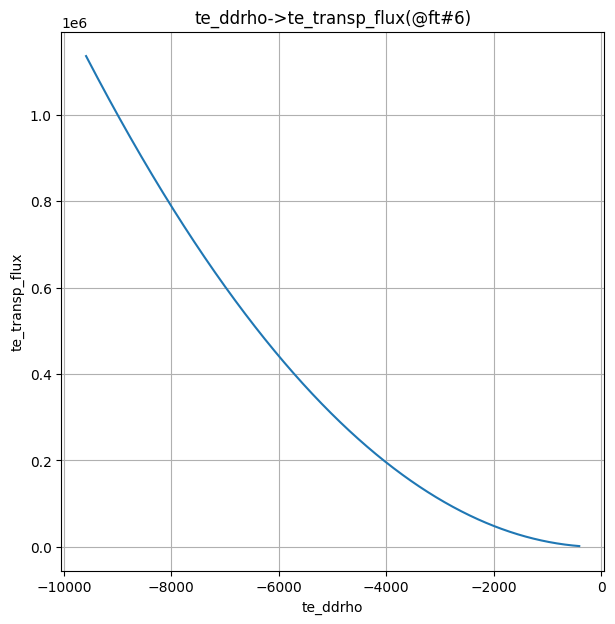

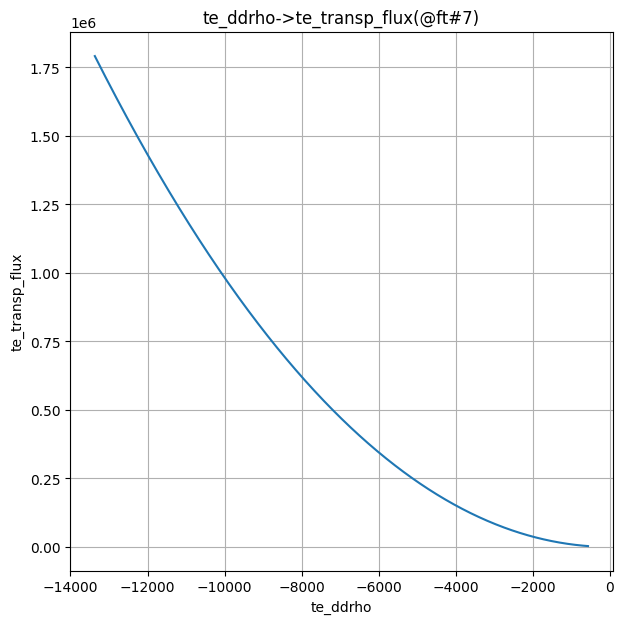

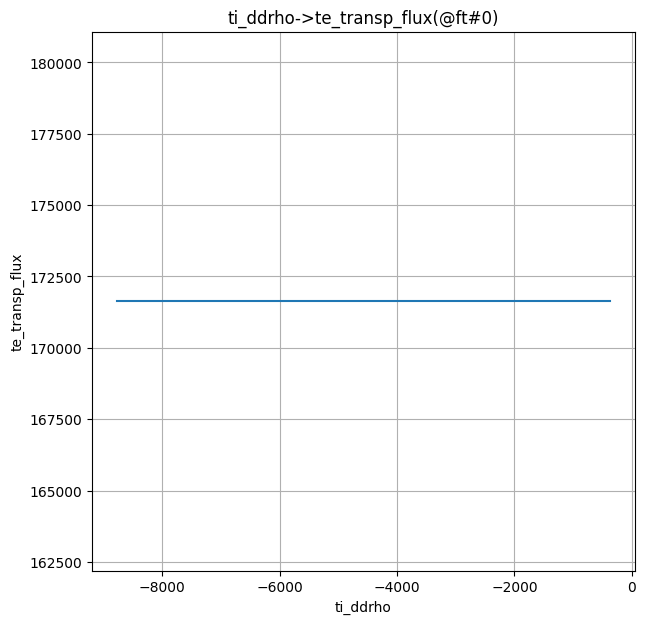

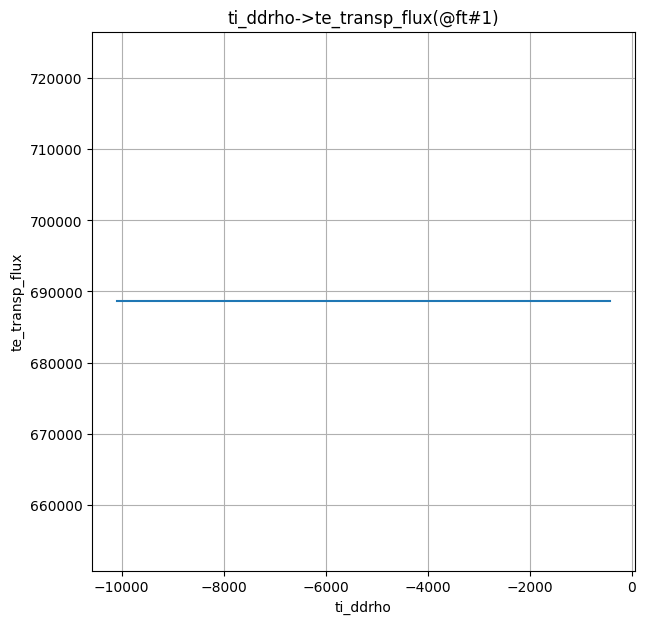

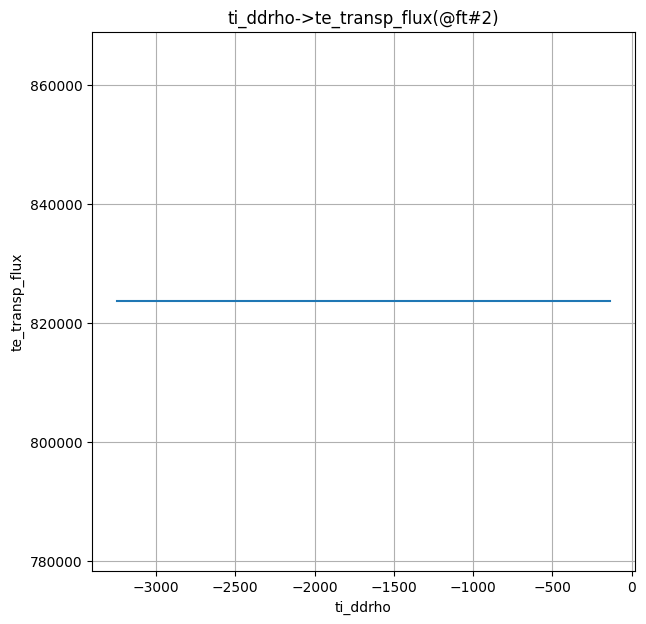

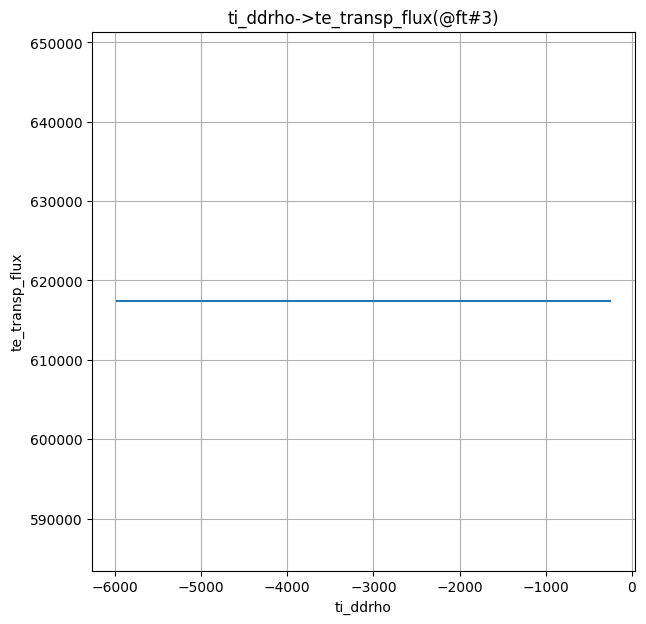

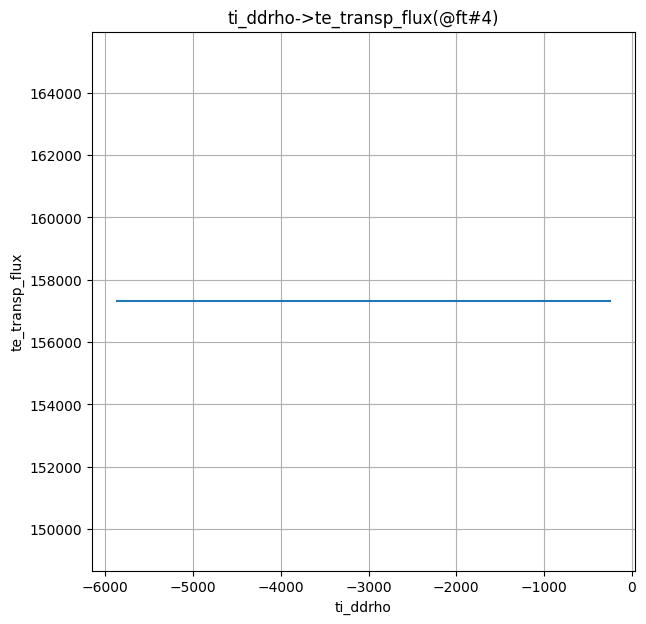

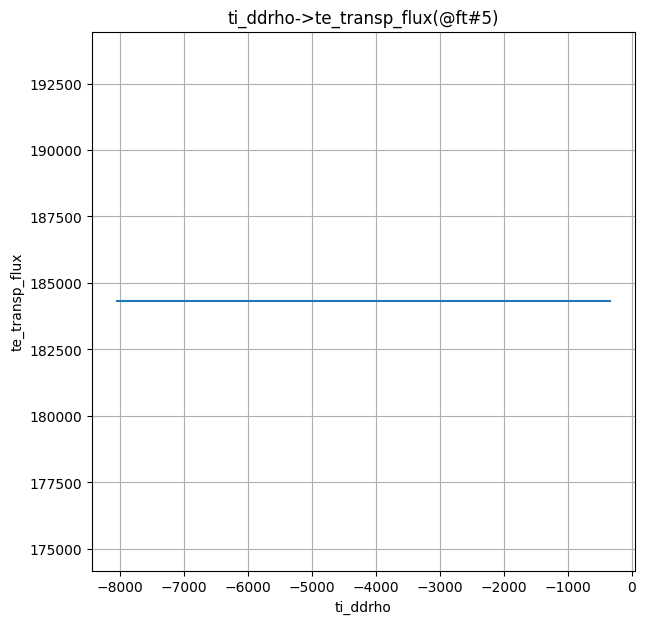

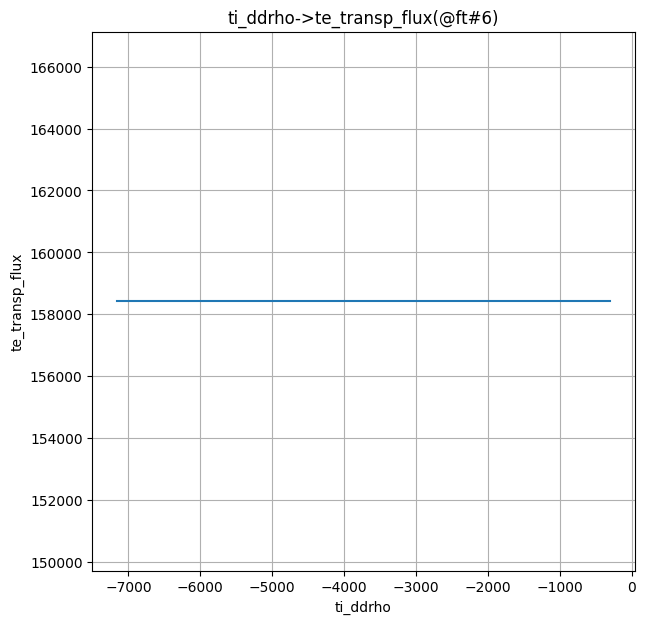

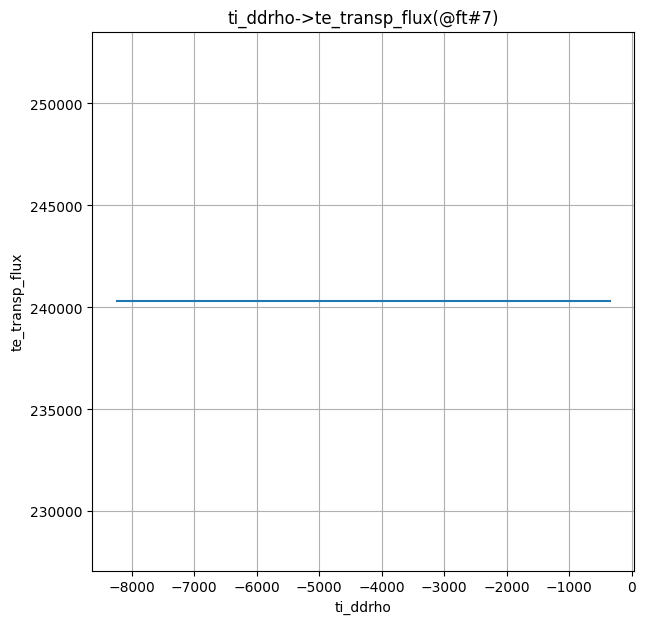

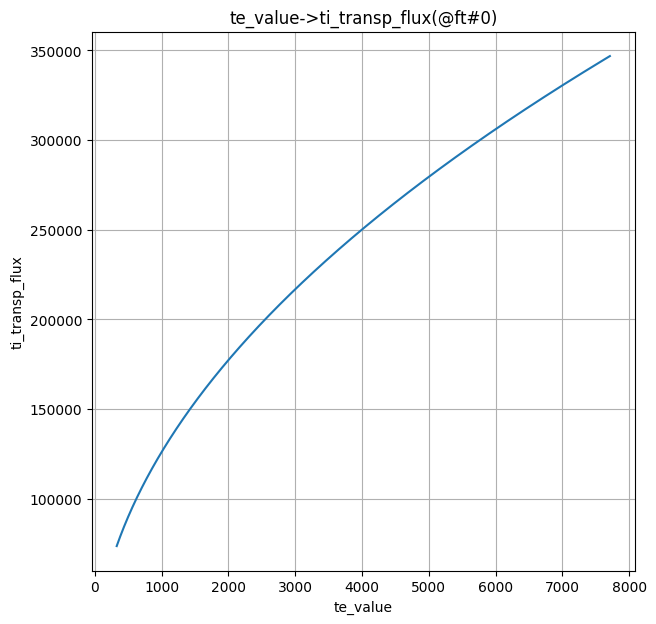

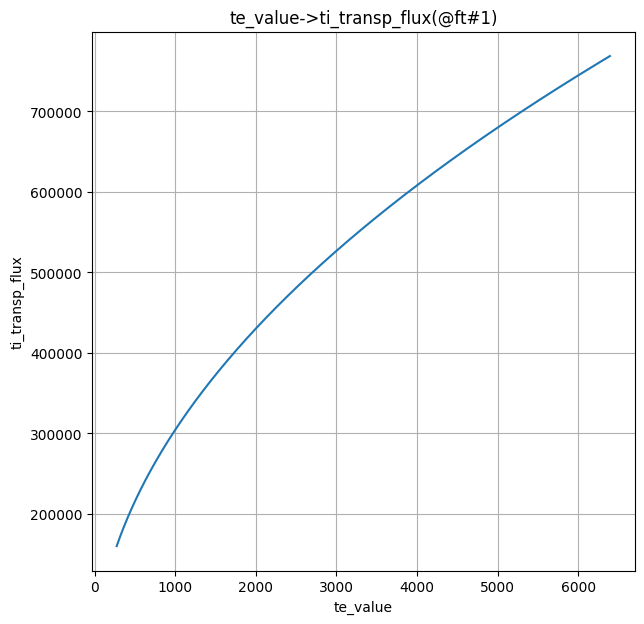

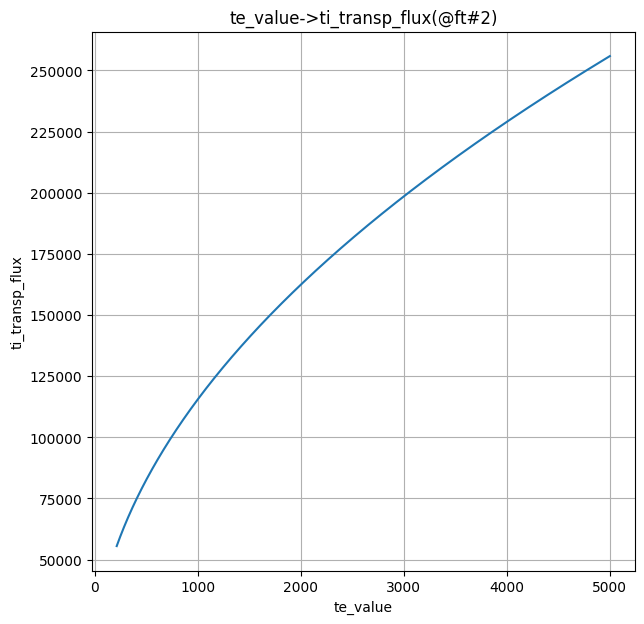

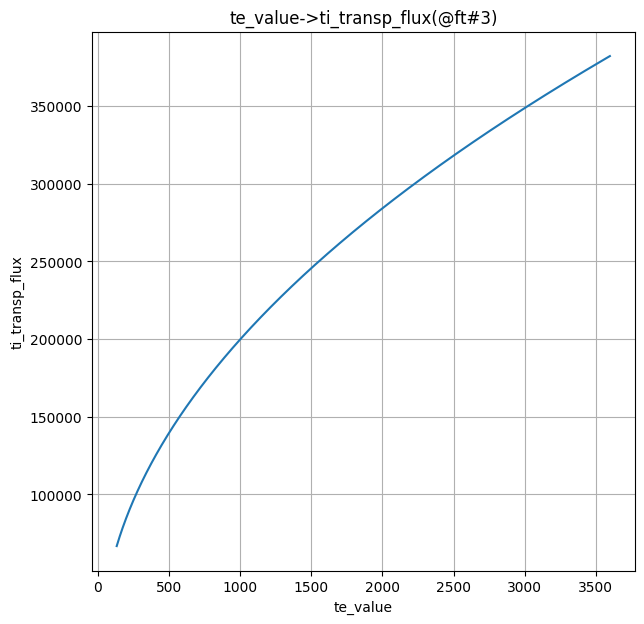

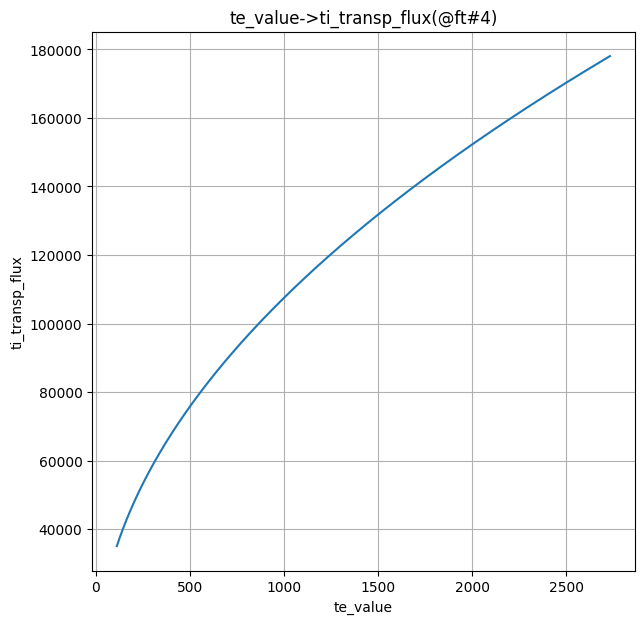

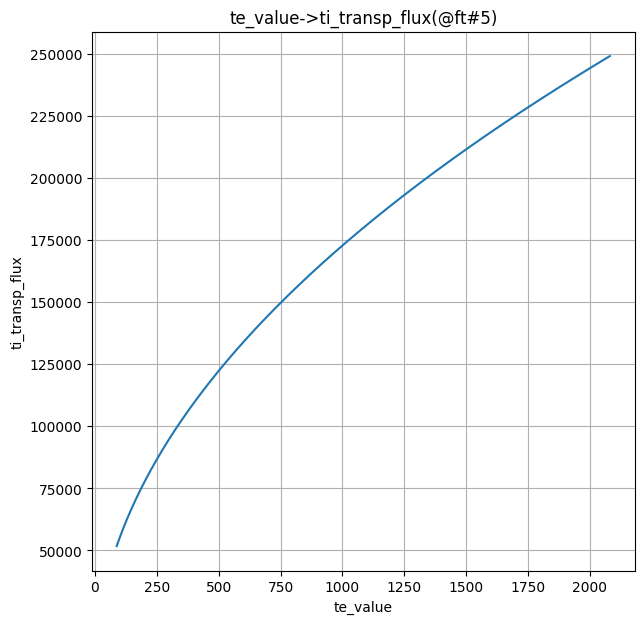

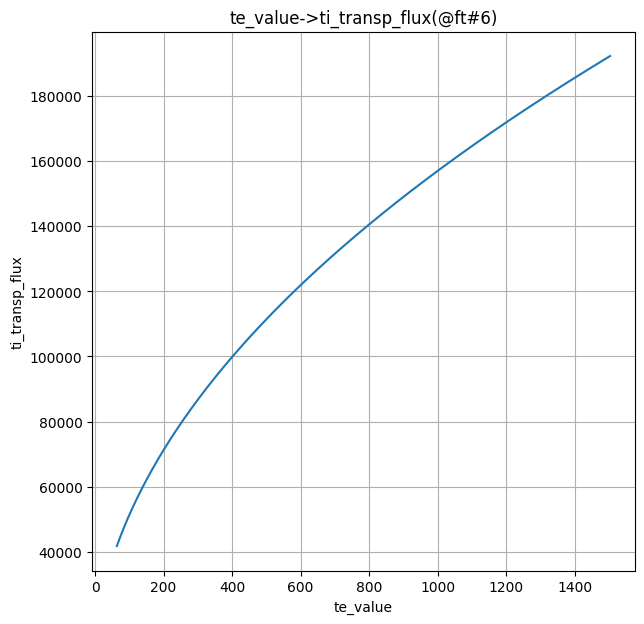

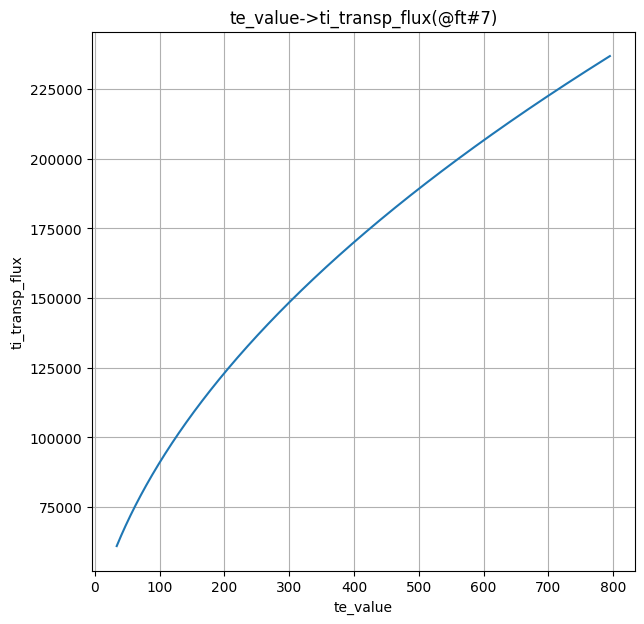

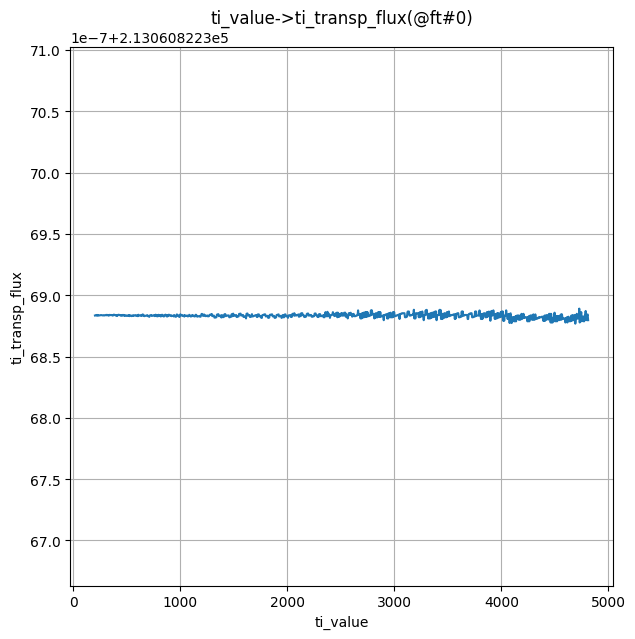

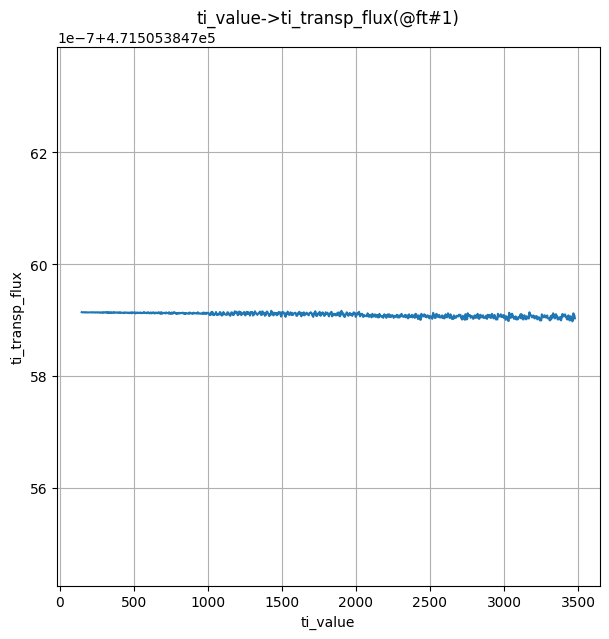

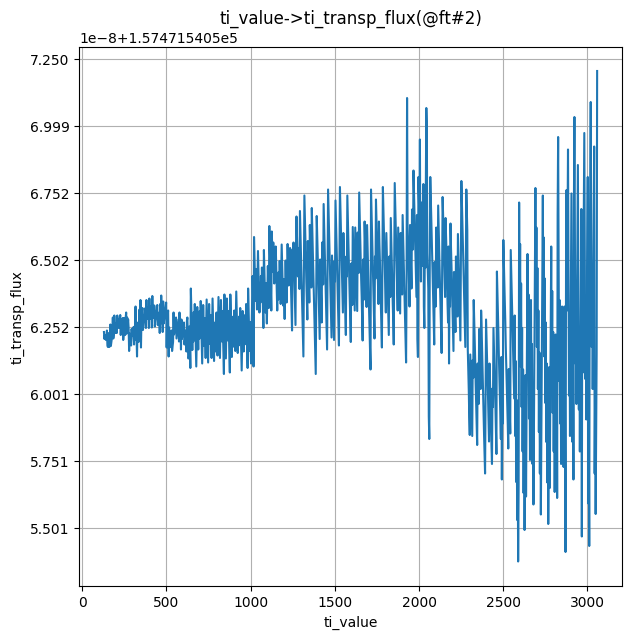

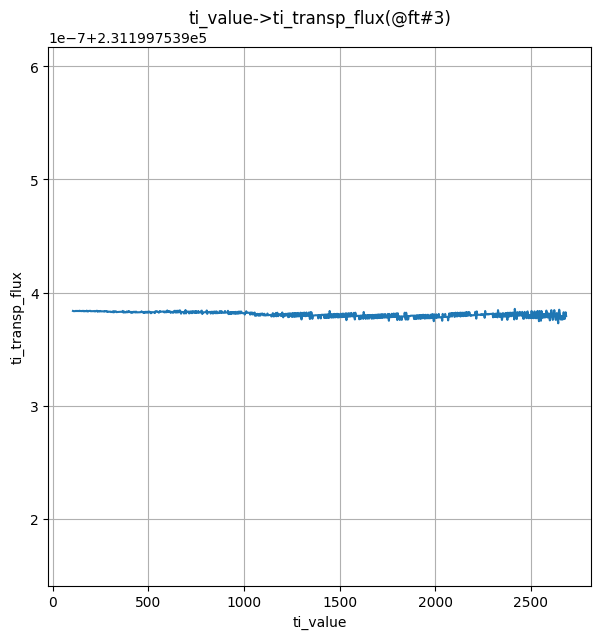

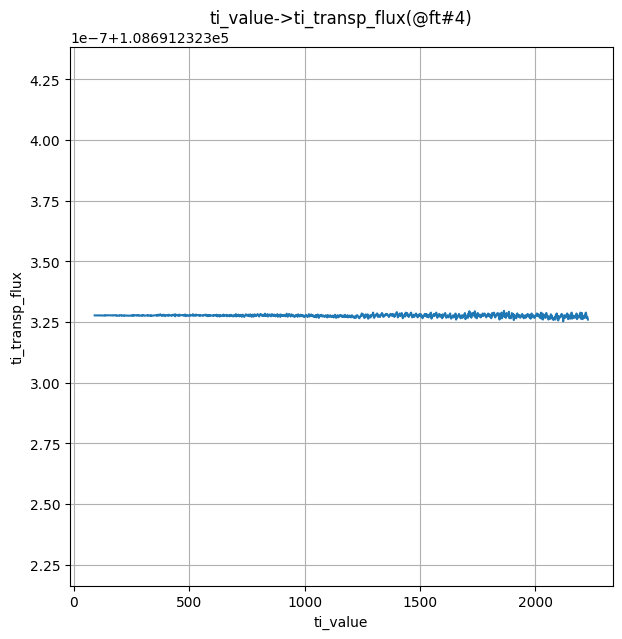

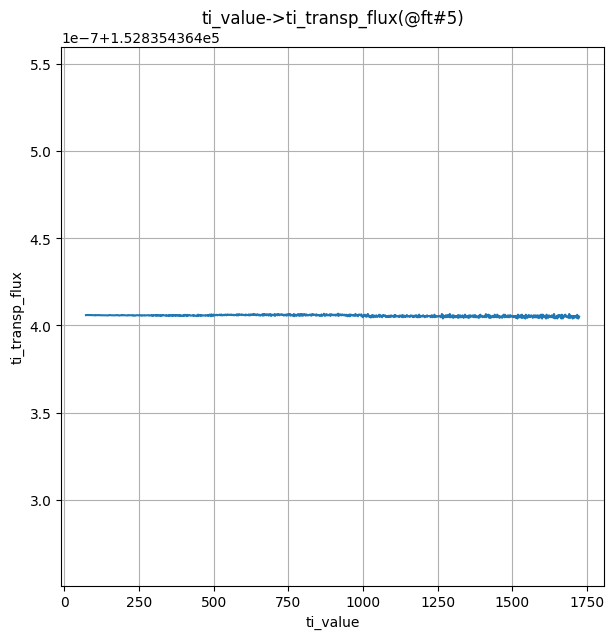

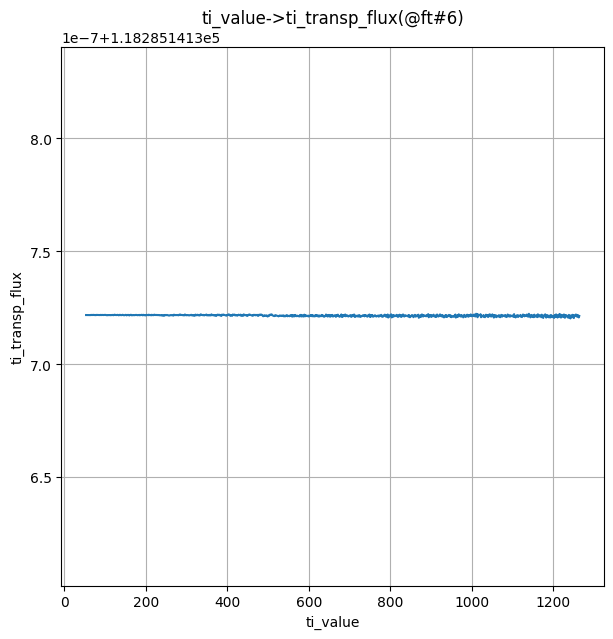

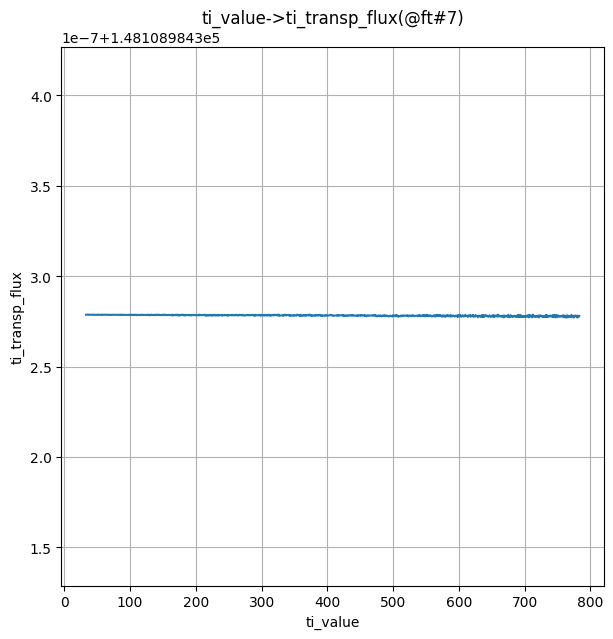

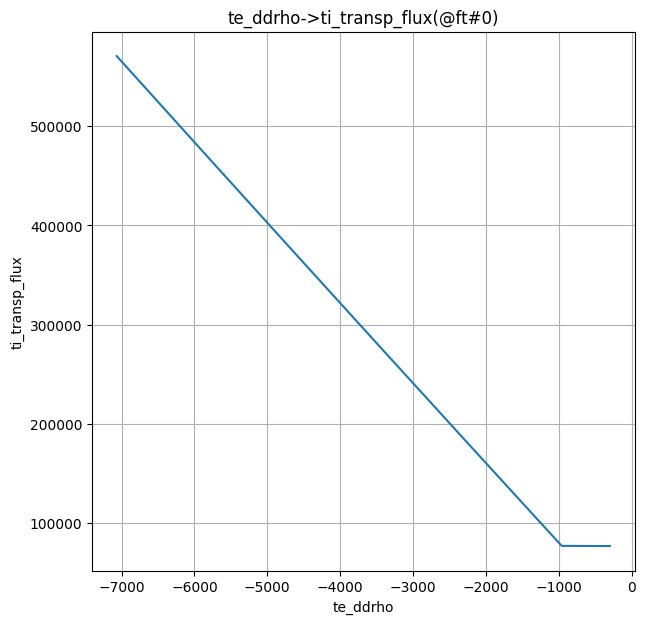

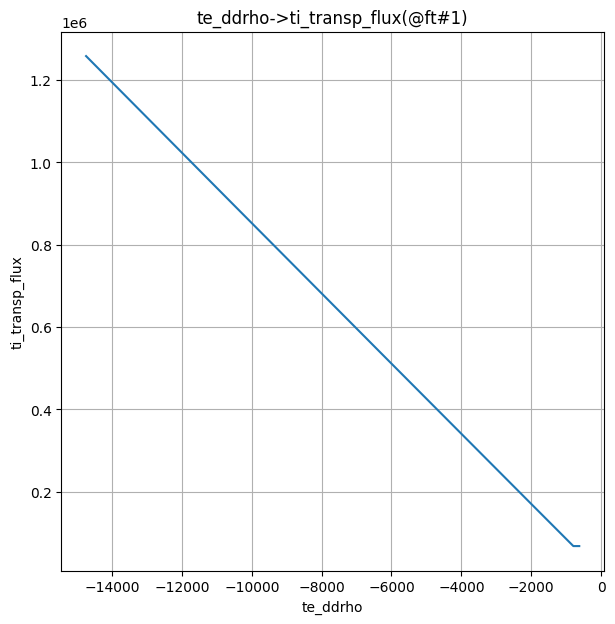

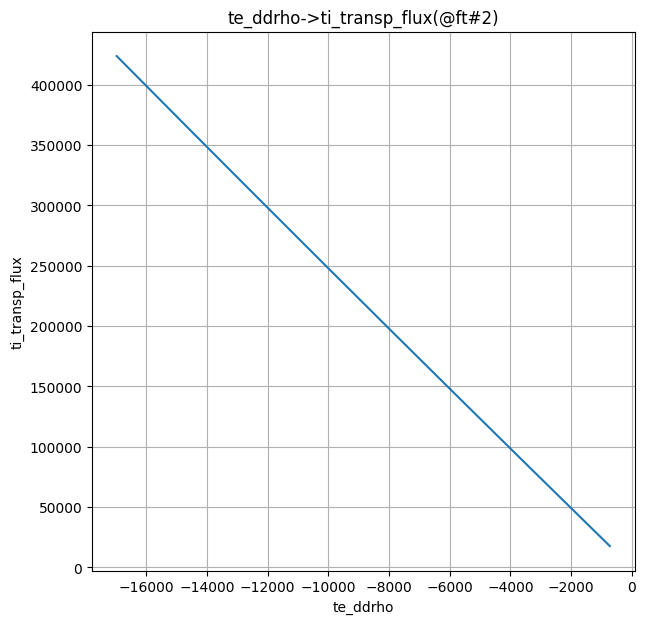

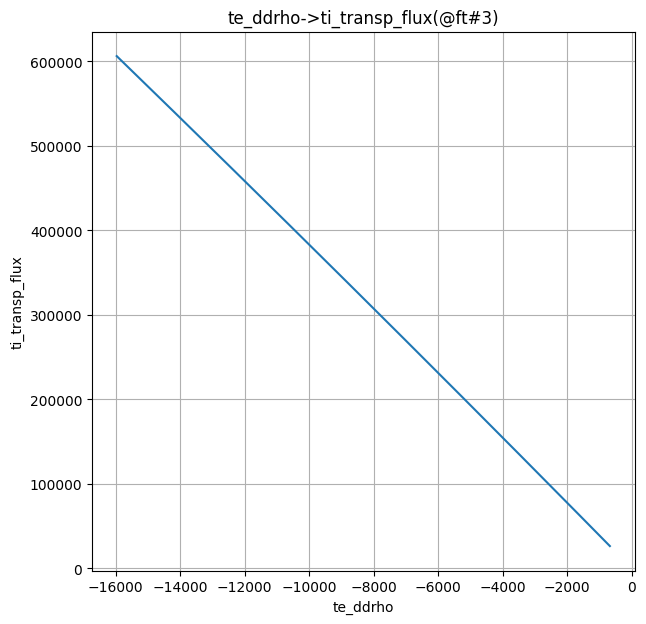

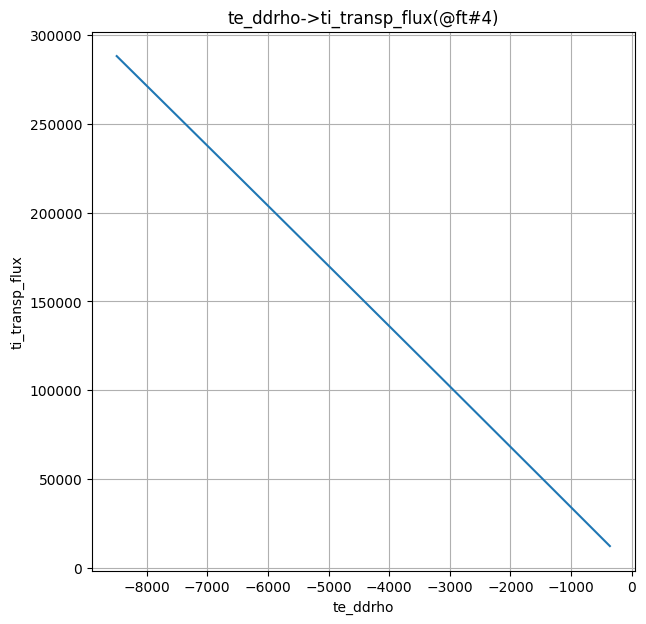

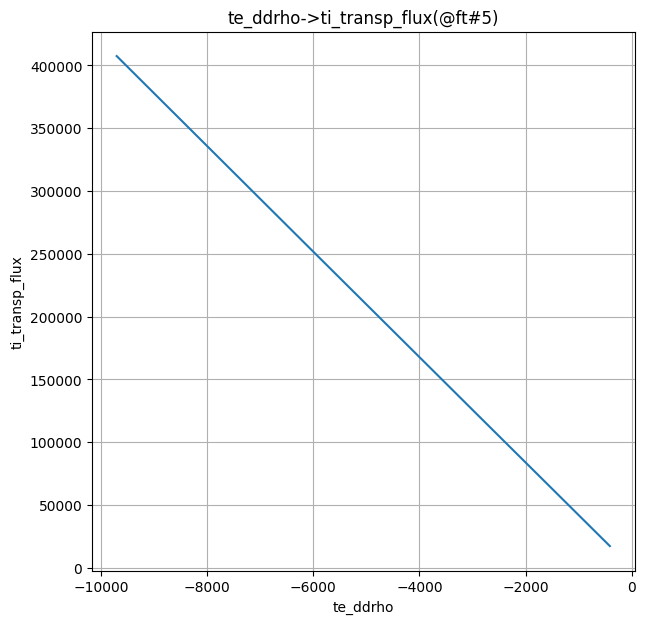

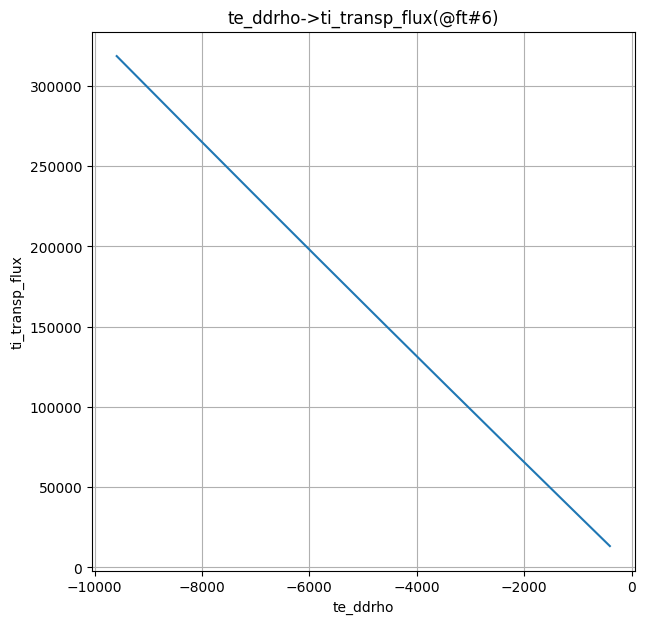

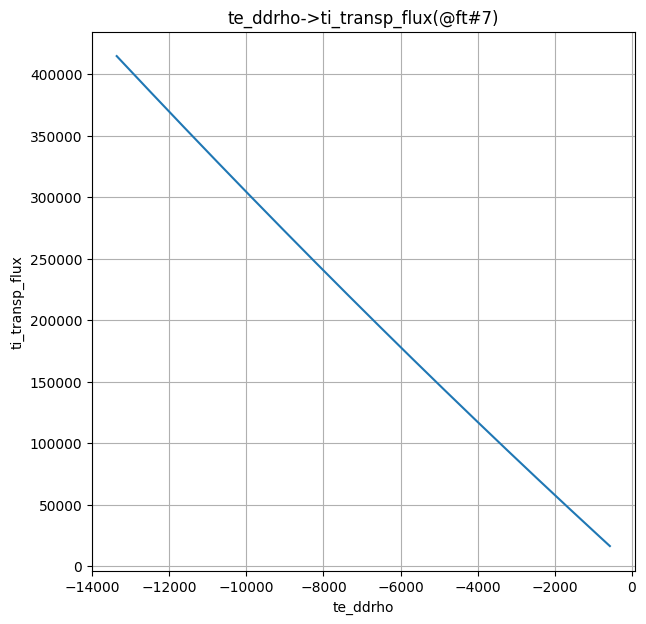

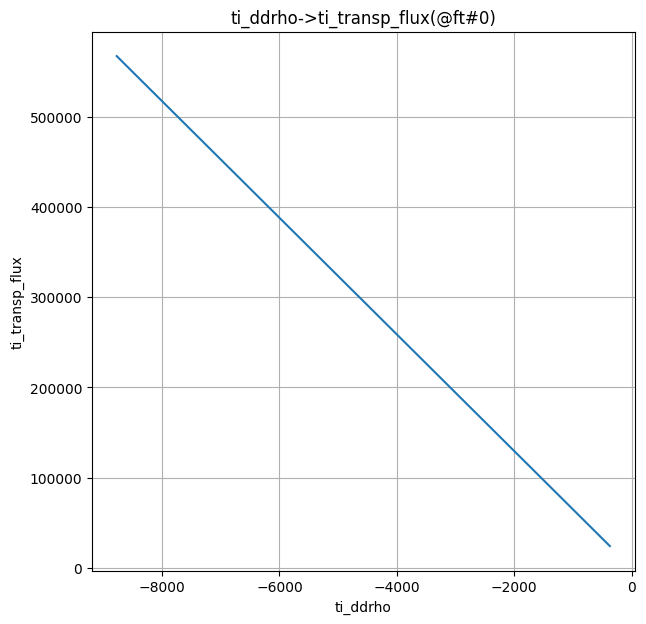

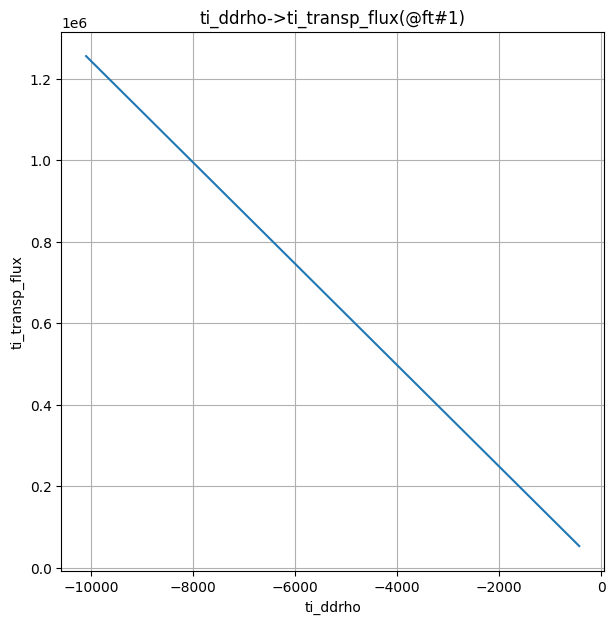

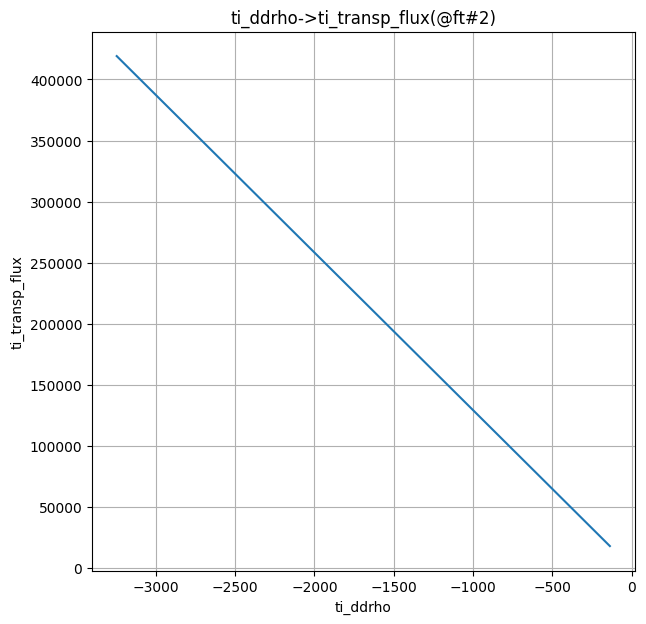

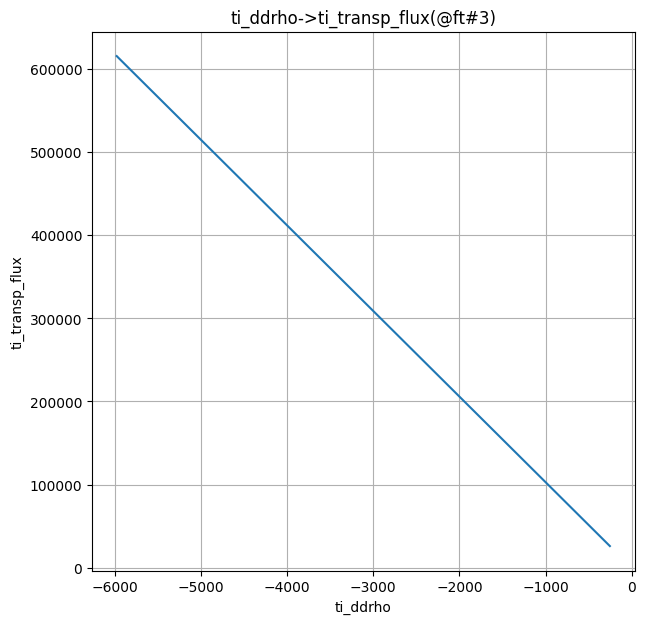

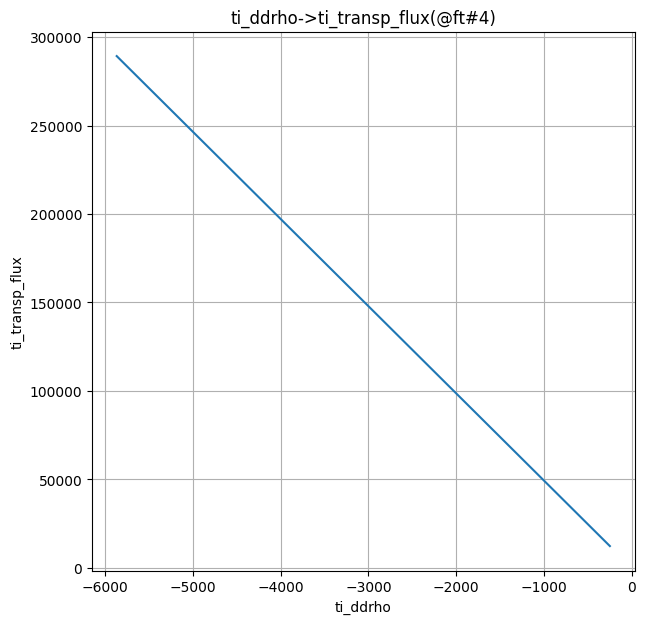

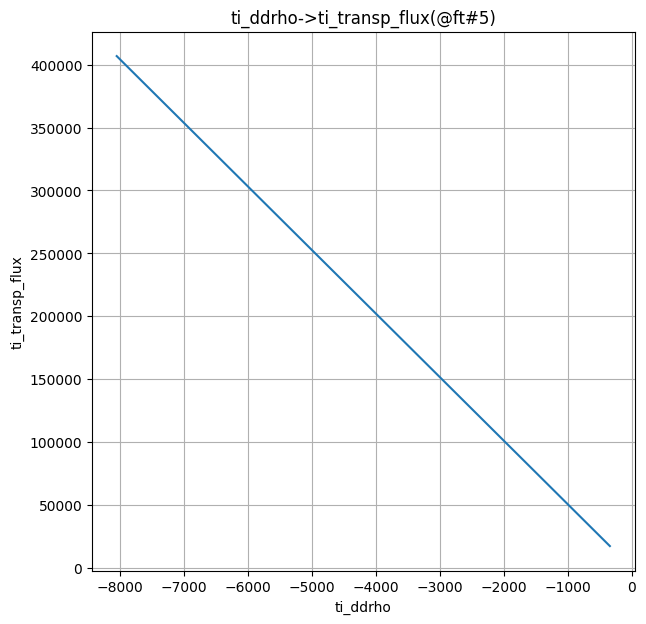

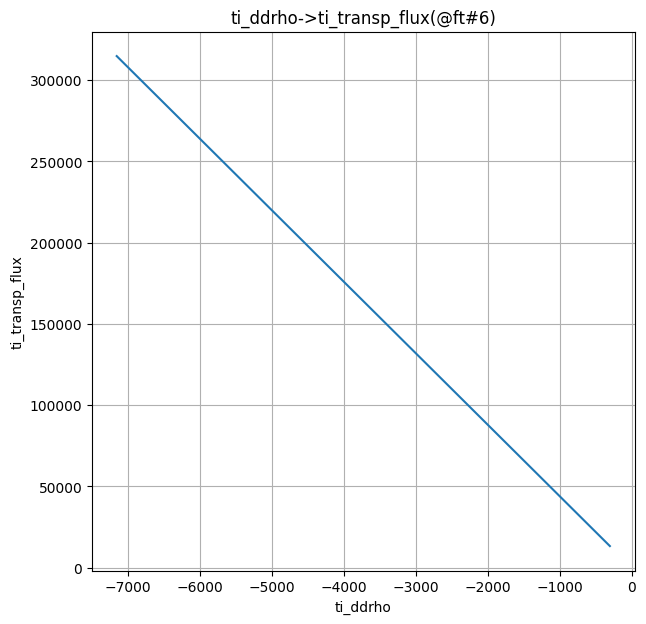

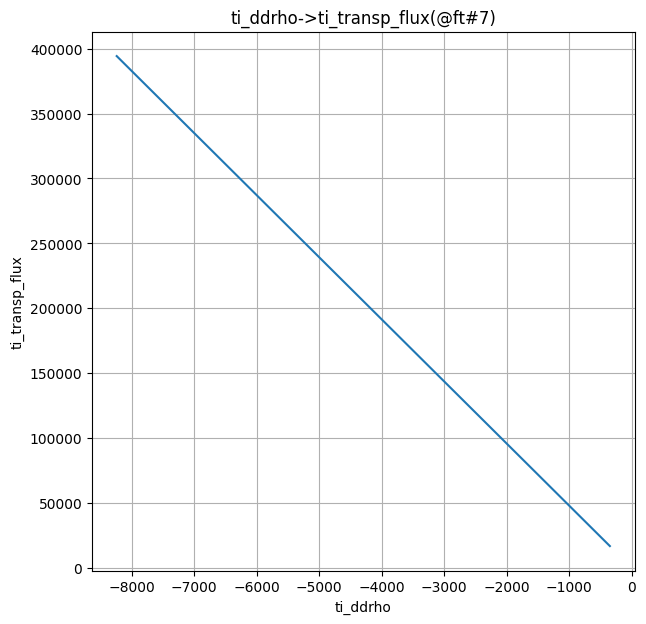

In [12]:
### To create GEM0 scan files:

#file_in = "../../muscle3/ref_train_data_5000.csv"
file_in = "gem0_new_data_20231215.csv"

xlabels = ['te_value', 'ti_value', 'te_ddrho', 'ti_ddrho']
ylabels = ['te_transp_flux', 'ti_transp_flux']

### Read inputs
data = pd.read_csv(file_in)
data_x = data[xlabels]
data_y = data[ylabels]
x = np.array(data_x)

scan_data = [[plot_gem0_scan(x,input_number=i,output_number=o, flag_plot=False) for i in range(len(xlabels))] for o in range(len(ylabels))]

scan_data_perft = []

# Reshape dictionaries
for n_ft in range(8):
     scan_data_perft.append({(f"{xlabels[i]}_{ylabels[j]}",k): scan_data[j][i][(f"ft{n_ft}",k)] for i,j,k in product(range(len(xlabels)),range(len(ylabels)),['x','y'])})	

# Write down
date_last = '20231218'

for n_ft in range(8):
     s = scan_data_perft[n_ft]
     spd = pd.DataFrame.from_dict(s)
     spd.to_csv(f"scan_gem0py_{date_last}_ft{n_ft}.csv")


In [13]:
# To plot the difference between GEM0 and surrogate, and theis comparison

date = '20231218'

file_pref_gem0 = 'gem0py_20231218'
file_pref_surr = 'gem0surr_20231217'

plot_diff_all(file_pref_1=file_pref_gem0, file_pref_2=file_pref_surr, save_file=f"gem0vssurr_{date}.pdf")

!mv *gem0vssurr_20231218.pdf ../../..

In [ ]:
# to generate a dataset of GEM0 evaluations